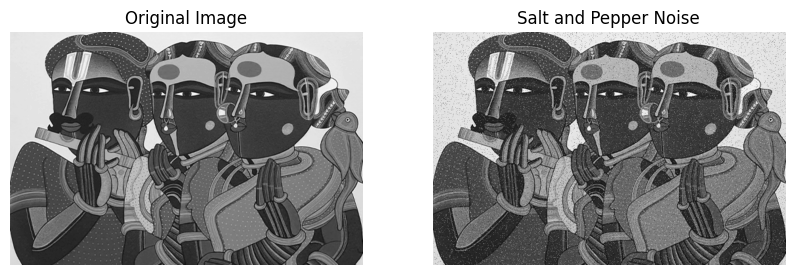

In [3]:
from skimage import io, util
import matplotlib.pyplot as plt

def s_p_noise(image, p_salt, p_pepper):
    noisy_image = util.random_noise(
        image, mode='s&p', amount=p_salt + p_pepper, salt_vs_pepper=p_salt / (p_salt + p_pepper)
    )
    return (noisy_image * 255).astype('uint8')


image = io.imread('sample.png', as_gray=True)

# Noise
prob_salt = 0.02
prob_pepper = 0.02
noisy_image = s_p_noise(image, prob_salt, prob_pepper)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Salt and Pepper Noise")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.show()


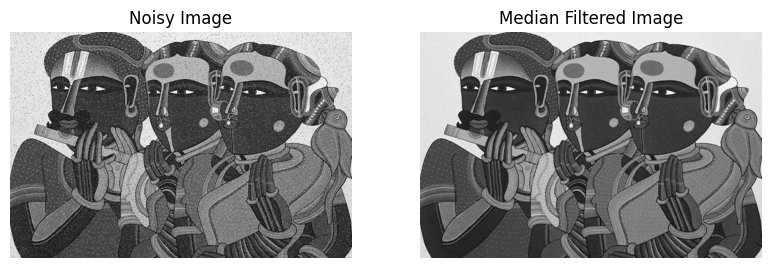

In [6]:
import numpy as np
from skimage import io, util
import matplotlib.pyplot as plt
from scipy.ndimage import convolve, median_filter as scipy_median_filter

def custom_median_filter(image, kernel=None, padding_type='reflect'):
    kernel_size = kernel if kernel else 3
    filtered_image = scipy_median_filter(image, size=kernel_size, mode=padding_type)
    return filtered_image

noisy_image = util.img_as_float(io.imread("Q1_salt_and_pepper_noise.jpg", as_gray=True))
median_filtered_image = custom_median_filter(noisy_image, kernel=3)

# Display Results
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title("Median Filtered Image")
plt.imshow(median_filtered_image, cmap='gray')
plt.axis('off')

plt.show()

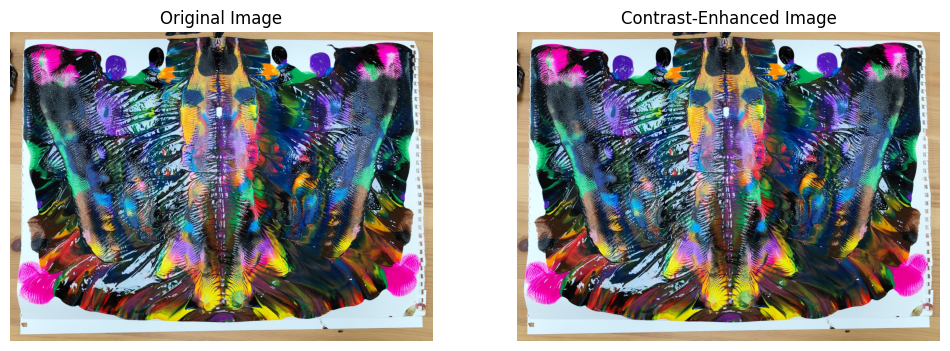

In [8]:
import numpy as np
from skimage import io
import matplotlib.pyplot as plt

def linear_stretch(channel):
    # Find the minimum and maximum pixel values
    min_val = np.min(channel)
    max_val = np.max(channel)
    # Apply the linear stretching formula
    stretched_channel = (channel - min_val) * (255 / (max_val - min_val))
    # Ensure values are in valid 8-bit range
    return np.clip(stretched_channel, 0, 255).astype('uint8')

def enhance_contrast_rgb_linear(image):
    # Split the image into R, G, and B channels
    R_channel = image[:, :, 0]
    G_channel = image[:, :, 1]
    B_channel = image[:, :, 2]

    # Apply linear stretching to each channel
    R_channel = linear_stretch(R_channel)
    G_channel = linear_stretch(G_channel)
    B_channel = linear_stretch(B_channel)

    # Combine the adjusted channels back into an RGB image
    enhanced_image = np.stack((R_channel, G_channel, B_channel), axis=-1)

    return enhanced_image


image = io.imread("Media.jpeg")

# Enhance contrast using linear stretching
enhanced_image = enhance_contrast_rgb_linear(image)


plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Contrast-Enhanced Image")
plt.imshow(enhanced_image)
plt.axis("off")

plt.show()


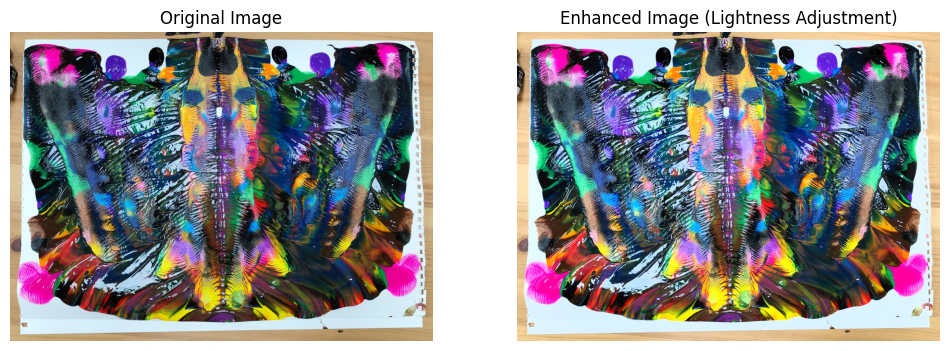

In [10]:
import numpy as np
from skimage import io
from skimage.color import rgb2hsv, hsv2rgb
import matplotlib.pyplot as plt

def enhance_contrast_hsv_lightness(image, adjustment_factor):
    # Convert RGB image to HSV color space
    hsv_image = rgb2hsv(image)

    # Extract the Value channel (V is at index 2)
    V_channel = hsv_image[:, :, 2]

    # Adjust the Value channel to enhance contrast
    V_channel = V_channel * adjustment_factor  # Increase or decrease lightness
    V_channel = np.clip(V_channel, 0, 1)  # Clip the values to the range [0, 1]

    # Update the HSV image with the adjusted Value channel
    hsv_image[:, :, 2] = V_channel
    rgb_image = hsv2rgb(hsv_image)

    return rgb_image

image = io.imread("Media.jpeg")
enhanced_image = enhance_contrast_hsv_lightness(image, adjustment_factor=1.2)

# Display Original and Enhanced Images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(image)
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Enhanced Image (Lightness Adjustment)")
plt.imshow(enhanced_image)
plt.axis("off")

plt.show()